# Iris Flowers Classification.

## Problem Statement:




In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

## Read the dataset

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", names = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "class"])
iris.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

## Study the data statistics

In [3]:
iris.describe(include='all')

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
count        150.000000      150.000000       150.000000      150.000000   
unique              NaN             NaN              NaN             NaN   
top                 NaN             NaN              NaN             NaN   
freq                NaN             NaN              NaN             NaN   
mean           5.843333        3.054000         3.758667        1.198667   
std            0.828066        0.433594         1.764420        0.763161   
min            4.300000        2.000000         1.000000        0.100000   
25%            5.100000        2.800000         1.600000        0.300000   
50%            5.800000        3.000000         4.350000        1.300000   
75%            6.400000        3.300000         5.100000        1.800000   
max            7.900000        4.400000         6.900000        2.500000   

                 class  
count              150  
unique               3  
top     Iris-virginica  
freq                50  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

### what can you infer from the `describe()` results?
- There are 150 entries or records in the dataset.
- Three unique categories in the class column.
- 50% of records of the sepal lengths are less than 5.8cm.
- The sepal lengths and widths are right skewed since their means are greater than the medians(50% percentile).
- It is reported that the mode of the class column is `Iris-virginica` and its frequency(Number of occurrences) is 50.

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     150 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


### what ca you infer from the `info()` results?
- The dataset has five columns and 150 entries.
- There are no missing values in this dataset.
- Four of the columns are of the float64 dtype and one of object or string dtype.

In [10]:
iris.groupby('class', as_index=False).count()

class  sepal_length_cm  sepal_width_cm  petal_length_cm  \
0      Iris-setosa               50              50               50   
1  Iris-versicolor               50              50               50   
2   Iris-virginica               50              50               50   

   petal_width_cm  
0              50  
1              50  
2              50

### Insights:
- There are three classes of iris flowers in the data set
- For each category, there are 50 entries or records.
- There is a contradiction with the previous `describe()` results which reported `Iris-virginica` as the mode. The three categories have the same frequency of 50.

## Visualizations

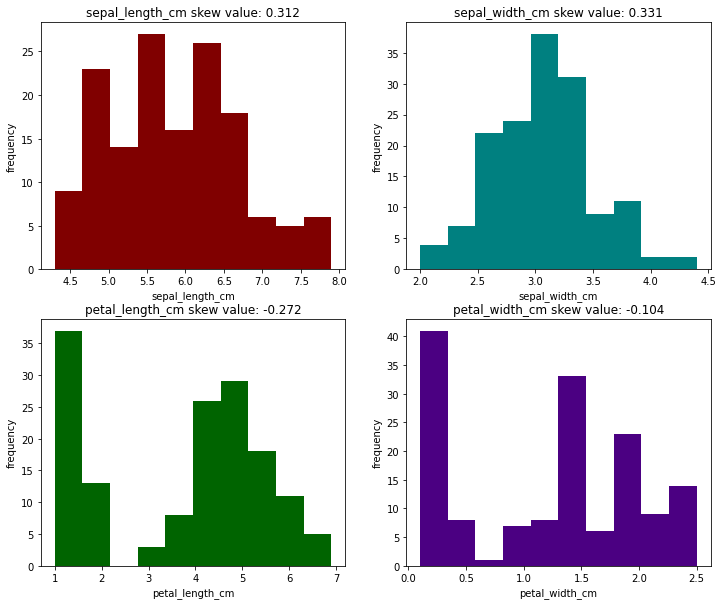

In [56]:

plt.figure(figsize=(12, 10))
colors = ['maroon', 'teal', 'darkgreen', 'indigo']
i = 0
for col in iris.drop('class', axis=1).columns:
    plt.subplot(2, 2, i+1)
    plt.hist(iris[col], color=colors[i])
    plt.title(col + " skew value: {:.3f}".format(skew(iris[col])))
    plt.xlabel(col)
    plt.ylabel("frequency")
    i += 1


## What are the distributions of the different features saying?


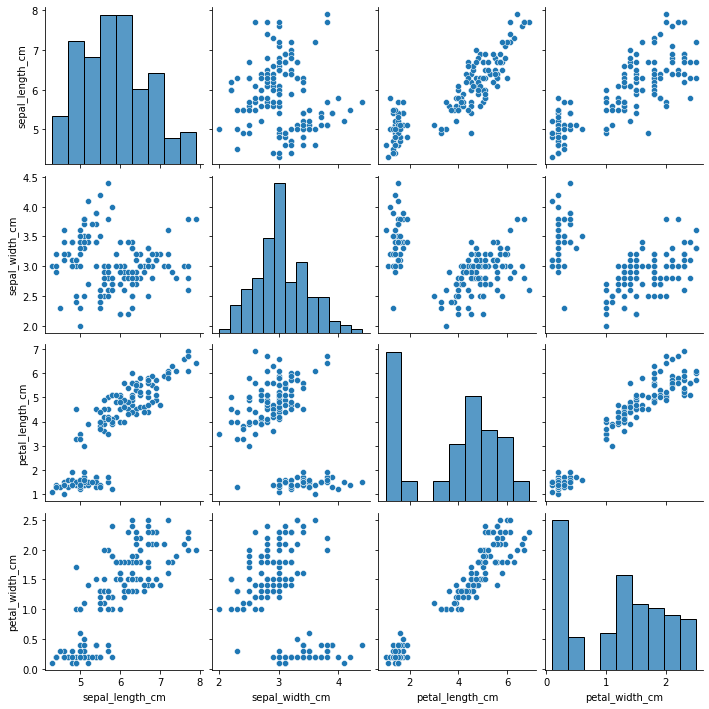

In [33]:
sns.pairplot(iris)

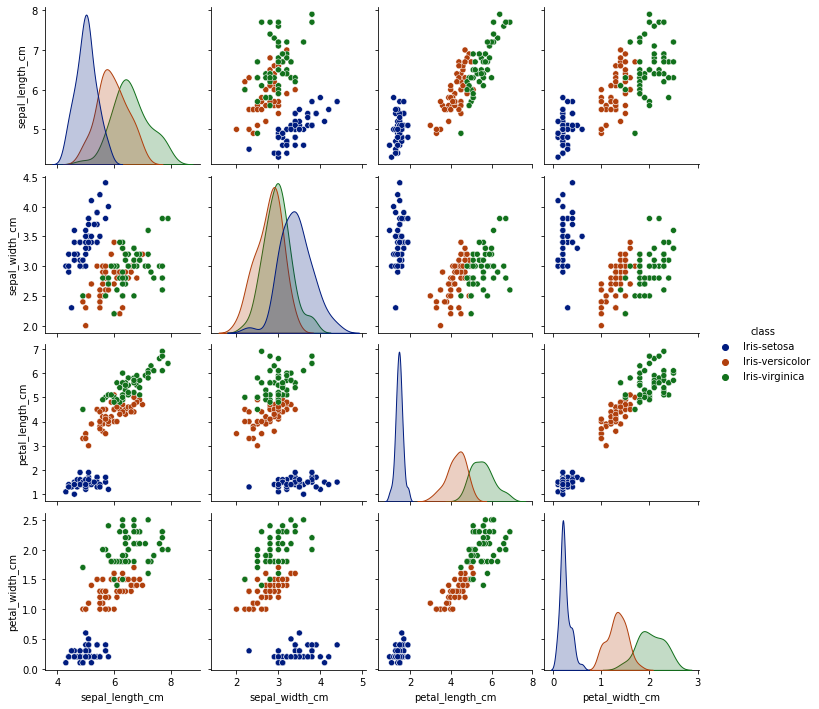

In [32]:
sns.pairplot(iris, hue='class', palette='dark')

### What can we infer from the pairplots?

This [Visualizing Data with PairPlots in Python](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) was very helpful.

<AxesSubplot:>

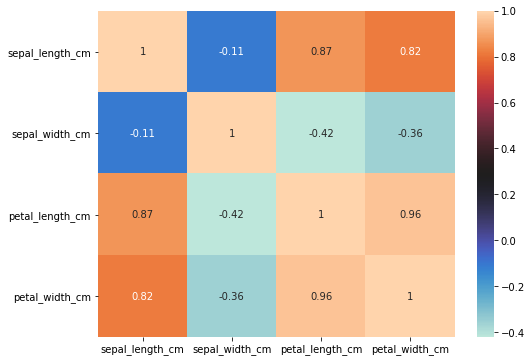

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(iris.drop('class', axis=1).corr(), annot=True, cmap='icefire')

### Output.
- There is a very strong positive correlation `(0.96)` between petal length and petal width.
- The sepal length also has a very strong correlation with the petal length `(0.87)` and the petal width `(0.82)`.
- The least correlated features are the sepal length and sepal width with a weak negative correlation of `-0.11`.

### These results!!!
- Is there any collinearity exhited by some features?
- Is collinearity an issue when working with a classification problem?
- How do I test for collinearity?

### Are there any machine learning algorithms that are not affected by multi-collinearity?
- **Random forest:**

#

## Lessons Learned
- Learned pandas `read_csv()` function can actually read data from the internet given a link to the file containing the data.
- Dived a little bit into understanding percentiles and how to interpret the results from the `describe()` method.

    - **[General Percentile Rule](https://statisticsbyjim.com/basics/percentiles/)**

    If value X is at the k-th percentile, then X is greater than k% of the records
- Learned how to visualize data with pairplots in python using `seaborn.pairplot()` and how to interpret the output.
- About pipelines